In [1]:
#Consider the PhysioNet Data 

In [3]:
import pandas as pd
import os
from glob import glob

In [5]:
# Path to the training data folder
data_path = "physionet.org/files/challenge-2019/1.0.0/training/training_setA" 

In [7]:
# Collect all .psv files
psv_files = glob(os.path.join(data_path, "*.psv"))

In [9]:
# Function to load and add patient ID
def load_psv(file_path):
    df = pd.read_csv(file_path, sep='|')
    df['patient_id'] = os.path.basename(file_path).split('.')[0]
    return df

In [11]:
# Load all files into one DataFrame
all_data = pd.concat([load_psv(f) for f in psv_files], ignore_index=True)

In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790215 entries, 0 to 790214
Data columns (total 42 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HR                729026 non-null  float64
 1   O2Sat             695136 non-null  float64
 2   Temp              266901 non-null  float64
 3   SBP               670014 non-null  float64
 4   MAP               709357 non-null  float64
 5   DBP               409918 non-null  float64
 6   Resp              712957 non-null  float64
 7   EtCO2             0 non-null       float64
 8   BaseExcess        82381 non-null   float64
 9   HCO3              63617 non-null   float64
 10  FiO2              112155 non-null  float64
 11  pH                90615 non-null   float64
 12  PaCO2             69288 non-null   float64
 13  SaO2              39160 non-null   float64
 14  AST               11820 non-null   float64
 15  BUN               64476 non-null   float64
 16  Alkalinephos      11

In [15]:
all_data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,patient_id
0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,NaN,1.0,25.0,...,223.0,160.0,77.27,1,0.0,1.0,-69.14,3,0,p014977
1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,NaN,1.0,25.0,...,NaN,NaN,77.27,1,0.0,1.0,-69.14,4,0,p014977
2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,...,NaN,NaN,77.27,1,0.0,1.0,-69.14,5,0,p014977
3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,NaN,-3.0,NaN,...,NaN,NaN,77.27,1,0.0,1.0,-69.14,6,0,p014977
4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,NaN,-3.0,NaN,...,NaN,NaN,77.27,1,0.0,1.0,-69.14,7,0,p014977


In [17]:
#check null values 
all_data.isnull().sum()

HR                   61189
O2Sat                95079
Temp                523314
SBP                 120201
MAP                  80858
DBP                 380297
Resp                 77258
EtCO2               790215
BaseExcess          707834
HCO3                726598
FiO2                678060
pH                  699600
PaCO2               720927
SaO2                751055
AST                 778395
BUN                 725739
Alkalinephos        778683
Calcium             750897
Chloride            724438
Creatinine          737728
Bilirubin_direct    789033
Glucose             693559
Lactate             763072
Magnesium           728734
Phosphate           750319
Potassium           704379
Bilirubin_total     780522
TroponinI           789250
Hct                 697157
Hgb                 720394
PTT                 751909
WBC                 730867
Fibrinogen          784185
Platelets           738716
Age                      0
Gender                   0
Unit1               386165
U

In [19]:
# Drop columns with too many missing values
all_data.drop(columns=['EtCO2', 'Bilirubin_direct', 'TroponinI'], inplace=True)

In [21]:

missing_percentage = (all_data.isnull().sum() / len(all_data)) * 100

# Create a new column to store the missing percentage for each column
missing_percentage_df = pd.DataFrame(missing_percentage, columns=['Missing Percentage'])

# Display the result
missing_percentage_df.sort_values(by='Missing Percentage', ascending=False)

,Missing Percentage
Fibrinogen,99.236917
Bilirubin_total,98.773372
Alkalinephos,98.540650
AST,98.504205
Lactate,96.565112
PTT,95.152459
SaO2,95.044387
Calcium,95.024392
Phosphate,94.951247
Platelets,93.482913


In [25]:
# Drop columns with >90% missing data
threshold = 90
cols_to_drop = missing_percentage_df[missing_percentage_df['Missing Percentage'] > threshold].index
data_cleaned = all_data.drop(columns=cols_to_drop)

In [29]:
data_cleaned.isnull().sum()

HR              61189
O2Sat           95079
Temp           523314
SBP            120201
MAP             80858
DBP            380297
Resp            77258
BaseExcess     707834
FiO2           678060
pH             699600
Glucose        693559
Potassium      704379
Hct            697157
Age                 0
Gender              0
Unit1          386165
Unit2          386165
HospAdmTime         8
ICULOS              0
SepsisLabel         0
patient_id          0
dtype: int64

In [31]:
missing_data = (data_cleaned.isnull().sum() / len(data_cleaned)) * 100

# Create a new column to store the missing percentage for each column
missing_percentage_data = pd.DataFrame(missing_data, columns=['Missing Percentage'])

In [33]:
# Display the result
missing_percentage_data.sort_values(by='Missing Percentage', ascending=False)

,Missing Percentage
BaseExcess,89.574863
Potassium,89.137640
pH,88.532868
Hct,88.223711
Glucose,87.768392
FiO2,85.807027
Temp,66.224255
Unit1,48.868346
Unit2,48.868346
DBP,48.125763


In [37]:
# Define columns to drop
cols_to_drop = ['BaseExcess', 'Potassium', 'pH', 'Hct', 'Glucose', 'FiO2']

# Drop them from the dataset
data_cleaned = data_cleaned.drop(columns=cols_to_drop)

In [39]:
data_cleaned.isnull().sum()

HR              61189
O2Sat           95079
Temp           523314
SBP            120201
MAP             80858
DBP            380297
Resp            77258
Age                 0
Gender              0
Unit1          386165
Unit2          386165
HospAdmTime         8
ICULOS              0
SepsisLabel         0
patient_id          0
dtype: int64

In [41]:
# Drop rows where Temp is null
data_cleaned = data_cleaned.dropna(subset=['Temp'])

In [43]:
data_cleaned.isnull().sum()

HR                813
O2Sat            8481
Temp                0
SBP             15154
MAP              4393
DBP             87999
Resp             5732
Age                 0
Gender              0
Unit1          112662
Unit2          112662
HospAdmTime         3
ICULOS              0
SepsisLabel         0
patient_id          0
dtype: int64

In [45]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266901 entries, 0 to 790213
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   HR           266088 non-null  float64
 1   O2Sat        258420 non-null  float64
 2   Temp         266901 non-null  float64
 3   SBP          251747 non-null  float64
 4   MAP          262508 non-null  float64
 5   DBP          178902 non-null  float64
 6   Resp         261169 non-null  float64
 7   Age          266901 non-null  float64
 8   Gender       266901 non-null  int64  
 9   Unit1        154239 non-null  float64
 10  Unit2        154239 non-null  float64
 11  HospAdmTime  266898 non-null  float64
 12  ICULOS       266901 non-null  int64  
 13  SepsisLabel  266901 non-null  int64  
 14  patient_id   266901 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 32.6+ MB


In [47]:
#drop null columns one by one:
data_cleaned = data_cleaned.dropna(subset=['HR'])

In [51]:
data_cleaned = data_cleaned.dropna(subset=['MAP'])

In [55]:
data_cleaned = data_cleaned.dropna(subset=['Resp'])

In [57]:
data_cleaned.isnull().sum()

HR                  0
O2Sat            7121
Temp                0
SBP             12330
MAP                 0
DBP             81866
Resp                0
Age                 0
Gender              0
Unit1          109099
Unit2          109099
HospAdmTime         2
ICULOS              0
SepsisLabel         0
patient_id          0
dtype: int64

In [59]:
#Since DBP can be calculate using SBP and MAP, we can drop the column
data_cleaned.drop(columns=['DBP'], inplace=True)

In [61]:
data_cleaned.isnull().sum()

HR                  0
O2Sat            7121
Temp                0
SBP             12330
MAP                 0
Resp                0
Age                 0
Gender              0
Unit1          109099
Unit2          109099
HospAdmTime         2
ICULOS              0
SepsisLabel         0
patient_id          0
dtype: int64

In [63]:
data_cleaned = data_cleaned.dropna(subset=['SBP'])

In [67]:
data_cleaned = data_cleaned.dropna(subset=['O2Sat'])

In [72]:
data_cleaned = data_cleaned.dropna(subset=['HospAdmTime'])

In [74]:
data_cleaned.isnull().sum()

HR                 0
O2Sat              0
Temp               0
SBP                0
MAP                0
Resp               0
Age                0
Gender             0
Unit1          98579
Unit2          98579
HospAdmTime        0
ICULOS             0
SepsisLabel        0
patient_id         0
dtype: int64

In [87]:
# Check for rows where both Unit1 and Unit2 are null
null_rows = data_cleaned[data_cleaned['Unit1'].isnull() & data_cleaned['Unit2'].isnull()]

In [89]:
null_rows

,HR,O2Sat,Temp,SBP,MAP,Resp,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,patient_id
59,83.0,99.0,36.11,94.0,87.00,16.0,65.55,1,NaN,NaN,-0.02,5,0,p000902
63,81.0,96.0,35.83,98.0,86.00,17.0,65.55,1,NaN,NaN,-0.02,9,0,p000902
68,85.0,97.0,36.00,98.0,84.00,19.0,65.55,1,NaN,NaN,-0.02,14,0,p000902
72,92.0,93.0,37.28,103.0,87.00,17.0,65.55,1,NaN,NaN,-0.02,18,0,p000902
77,87.0,97.0,36.89,95.0,85.00,15.0,65.55,1,NaN,NaN,-0.02,23,0,p000902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790170,78.0,98.0,37.67,96.0,73.33,24.0,61.03,0,NaN,NaN,-0.03,15,0,p009081
790174,77.0,95.0,36.67,93.0,67.67,24.0,61.03,0,NaN,NaN,-0.03,19,0,p009081
790178,73.0,95.0,37.67,99.0,69.67,28.0,61.03,0,NaN,NaN,-0.03,23,0,p009081
790191,66.0,96.0,37.44,90.0,65.33,24.0,61.03,0,NaN,NaN,-0.03,36,0,p009081


In [91]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238008 entries, 0 to 790213
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   HR           238008 non-null  float64
 1   O2Sat        238008 non-null  float64
 2   Temp         238008 non-null  float64
 3   SBP          238008 non-null  float64
 4   MAP          238008 non-null  float64
 5   Resp         238008 non-null  float64
 6   Age          238008 non-null  float64
 7   Gender       238008 non-null  int64  
 8   Unit1        139429 non-null  float64
 9   Unit2        139429 non-null  float64
 10  HospAdmTime  238008 non-null  float64
 11  ICULOS       238008 non-null  int64  
 12  SepsisLabel  238008 non-null  int64  
 13  patient_id   238008 non-null  object 
dtypes: float64(10), int64(3), object(1)
memory usage: 27.2+ MB


In [93]:
# View sample rows of Unit1 and Unit2 columns
data_cleaned[['Unit1', 'Unit2']].sample(10)  # Shows 10 random rows from these columns

,Unit1,Unit2
207931,0.0,1.0
97449,NaN,NaN
189377,NaN,NaN
421449,0.0,1.0
361359,0.0,1.0
465670,0.0,1.0
461536,1.0,0.0
480506,NaN,NaN
137124,NaN,NaN
383281,0.0,1.0


In [97]:
# Filter rows where both Unit1 and Unit2 are not null and are equal
equal_rows = data_cleaned[
    (data_cleaned['Unit1'].notnull()) & 
    (data_cleaned['Unit2'].notnull()) & 
    (data_cleaned['Unit1'] == data_cleaned['Unit2'])
]

# Display count and a few sample rows
print(f"Number of rows where Unit1 == Unit2 (excluding NaNs): {len(equal_rows)}")
equal_rows[['Unit1', 'Unit2']].head()

Number of rows where Unit1 == Unit2 (excluding NaNs): 98579


,Unit1,Unit2
59,Unknown,Unknown
63,Unknown,Unknown
68,Unknown,Unknown
72,Unknown,Unknown
77,Unknown,Unknown


In [99]:
data_cleaned[['Unit1', 'Unit2']].sample(10)

,Unit1,Unit2
145877,Unknown,Unknown
655683,Unknown,Unknown
684962,0.0,1.0
353759,Unknown,Unknown
716659,Unknown,Unknown
224110,Unknown,Unknown
737010,1.0,0.0
54166,Unknown,Unknown
730734,1.0,0.0
665026,Unknown,Unknown


In [101]:
# Create encoded columns
data_cleaned['Unit1_encoded'] = data_cleaned['Unit1'].apply(lambda x: 1 if x == 1.0 else 0)
data_cleaned['Unit2_encoded'] = data_cleaned['Unit2'].apply(lambda x: 1 if x == 1.0 else 0)
data_cleaned['Unit_Unknown'] = data_cleaned.apply(
    lambda row: 1 if pd.isna(row['Unit1']) and pd.isna(row['Unit2']) else 0, axis=1
)

In [108]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238008 entries, 0 to 790213
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   HR             238008 non-null  float64
 1   O2Sat          238008 non-null  float64
 2   Temp           238008 non-null  float64
 3   SBP            238008 non-null  float64
 4   MAP            238008 non-null  float64
 5   Resp           238008 non-null  float64
 6   Age            238008 non-null  float64
 7   Gender         238008 non-null  int64  
 8   Unit1          238008 non-null  object 
 9   Unit2          238008 non-null  object 
 10  HospAdmTime    238008 non-null  float64
 11  ICULOS         238008 non-null  int64  
 12  SepsisLabel    238008 non-null  int64  
 13  patient_id     238008 non-null  object 
 14  Both_Unknown   238008 non-null  bool   
 15  Unit1_encoded  238008 non-null  int64  
 16  Unit2_encoded  238008 non-null  int64  
 17  Unit_Unknown   238008 non-null  in

In [118]:
# Select only the necessary columns
selected_columns = [
    'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp',
    'Age', 'Gender', 'HospAdmTime', 'ICULOS',
    'SepsisLabel', 'patient_id',
    'Unit1_encoded', 'Unit2_encoded', 'Unit_Unknown'
]

# Create a new DataFrame
data_final = data_cleaned[selected_columns]

# Save it to CSV
data_final.to_csv('sepsis_cleaned_data_train_A.csv', index=False)

In [120]:
data_final.describe()

,HR,O2Sat,Temp,SBP,MAP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Unit1_encoded,Unit2_encoded,Unit_Unknown
count,238008.000000,238008.000000,238008.000000,238008.000000,238008.000000,238008.000000,238008.000000,238008.000000,238008.000000,238008.000000,238008.000000,238008.000000,238008.000000,238008.000000
mean,85.993913,97.518199,37.044049,119.892412,78.288838,18.532771,63.898654,0.598732,-53.622616,25.698981,0.019520,0.192099,0.393718,0.414184
std,16.192118,2.815595,0.780101,20.762252,14.374940,5.420161,15.517314,0.490156,150.842632,27.219839,0.138345,0.393951,0.488575,0.492582
min,20.000000,21.000000,20.900000,28.000000,20.000000,1.000000,18.110000,0.000000,-3710.660000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,96.000000,36.560000,105.000000,68.330000,15.000000,54.370000,0.000000,-45.650000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,98.000000,37.060000,117.000000,76.000000,18.000000,66.220000,1.000000,-4.210000,19.000000,0.000000,0.000000,0.000000,0.000000
75%,96.000000,100.000000,37.560000,132.500000,86.000000,22.000000,76.052500,1.000000,-0.030000,33.000000,0.000000,0.000000,1.000000,1.000000
max,223.000000,100.000000,42.220000,274.000000,300.000000,69.000000,89.000000,1.000000,23.990000,336.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
data_cleaned['Unit_Unknown'] = data_cleaned.apply(
    lambda row: 1 if row['Unit1'] == 'Unknown' and row['Unit2'] == 'Unknown' else 0, axis=1
)

558923    0
225094    0
758394    1
322249    0
173091    1
106427    0
630214    0
287089    1
94909     0
321455    1
Name: Unit_Unknown, dtype: int64

In [122]:
data_cleaned

,HR,O2Sat,Temp,SBP,MAP,Resp,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,patient_id,Both_Unknown,Unit1_encoded,Unit2_encoded,Unit_Unknown
0,80.0,100.0,36.50,121.00,58.0,13.50,77.27,1,0.0,1.0,-69.14,3,0,p014977,False,0,1,0
1,76.0,100.0,36.25,113.25,61.0,12.00,77.27,1,0.0,1.0,-69.14,4,0,p014977,False,0,1,0
2,80.0,100.0,36.25,132.75,71.5,12.00,77.27,1,0.0,1.0,-69.14,5,0,p014977,False,0,1,0
3,78.0,100.0,36.10,103.50,58.0,12.00,77.27,1,0.0,1.0,-69.14,6,0,p014977,False,0,1,0
4,74.0,100.0,36.00,128.75,69.5,12.50,77.27,1,0.0,1.0,-69.14,7,0,p014977,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790201,80.0,100.0,36.78,102.00,65.5,10.25,66.47,1,0.0,1.0,-12.88,6,0,p005863,False,0,1,0
790203,80.0,100.0,37.33,103.00,73.0,10.00,66.47,1,0.0,1.0,-12.88,8,0,p005863,False,0,1,0
790206,80.0,99.5,36.11,114.50,78.5,17.00,66.47,1,0.0,1.0,-12.88,11,0,p005863,False,0,1,0
790207,81.0,99.0,35.78,109.00,75.0,18.00,66.47,1,0.0,1.0,-12.88,12,0,p005863,False,0,1,0


In [124]:
#EDA for all_data_set A

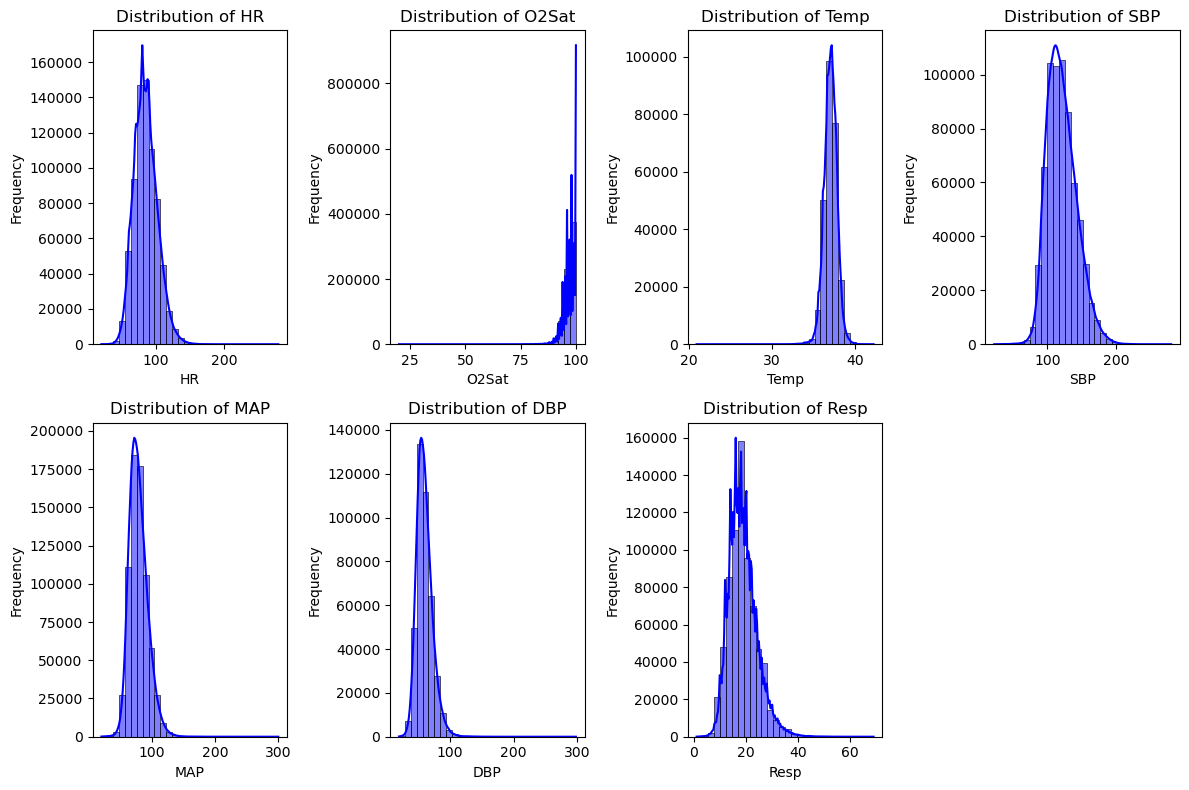

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size for the plots
plt.figure(figsize=(12, 8))

# List of vital sign columns
vital_signs = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp']

# Create subplots for each vital sign
for i, column in enumerate(vital_signs):
    plt.subplot(2, 4, i+1)
    sns.histplot(all_data[column].dropna(), kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

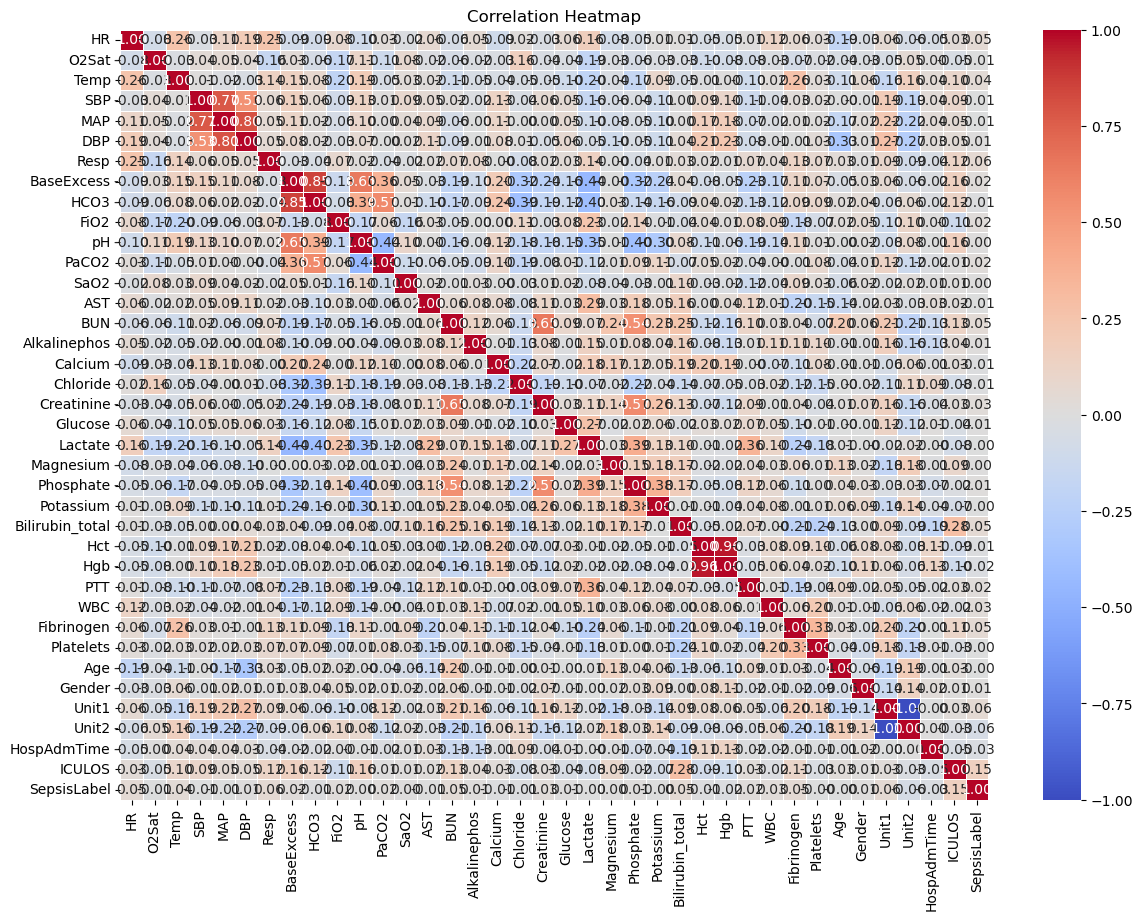

In [130]:
# Select continuous variables (exclude non-numeric columns)
continuous_vars = all_data.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
corr_matrix = all_data[continuous_vars].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_11485/3583615147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=all_data, x='SepsisLabel', palette='Set2')


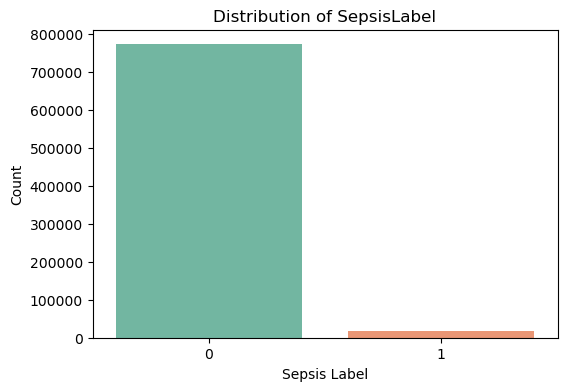

In [132]:
# Count plot for SepsisLabel
plt.figure(figsize=(6, 4))
sns.countplot(data=all_data, x='SepsisLabel', palette='Set2')
plt.title('Distribution of SepsisLabel')
plt.xlabel('Sepsis Label')
plt.ylabel('Count')
plt.show()

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_11485/1446615269.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_data, x='SepsisLabel', y=column, palette='Set1')
/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_11485/1446615269.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_data, x='SepsisLabel', y=column, palette='Set1')
/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_11485/1446615269.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_data, x='SepsisLabel', y=column, palet

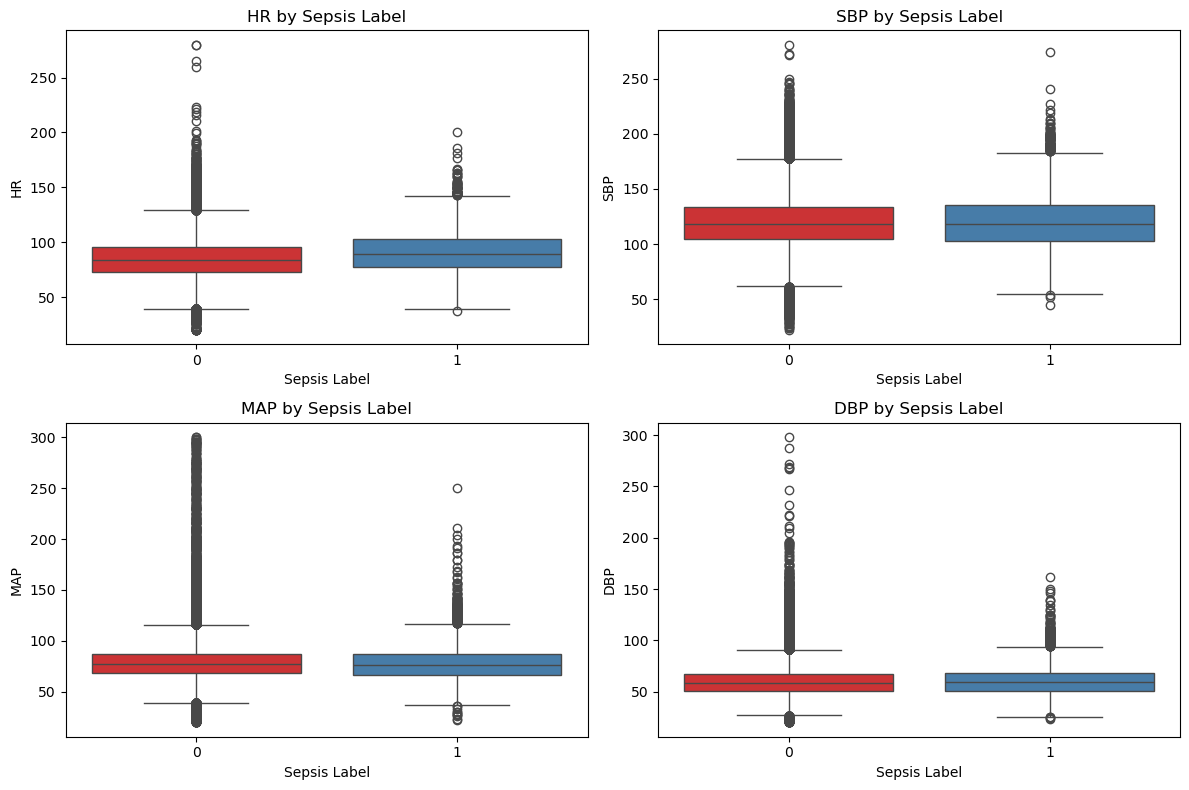

In [134]:
# Create boxplots for vital signs by SepsisLabel
plt.figure(figsize=(12, 8))

# List of key vital signs
key_vital_signs = ['HR', 'SBP', 'MAP', 'DBP']

for i, column in enumerate(key_vital_signs):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=all_data, x='SepsisLabel', y=column, palette='Set1')
    plt.title(f'{column} by Sepsis Label')
    plt.xlabel('Sepsis Label')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

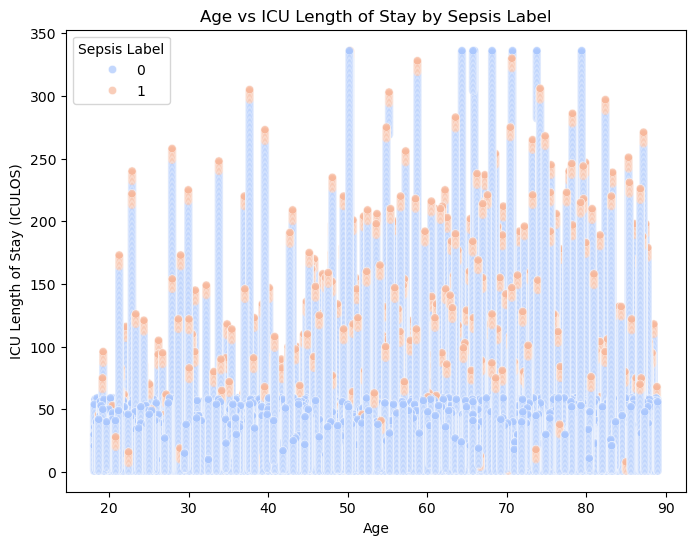

In [136]:
# Scatter plot of Age vs ICULOS, colored by SepsisLabel
plt.figure(figsize=(8, 6))
sns.scatterplot(data=all_data, x='Age', y='ICULOS', hue='SepsisLabel', palette='coolwarm', alpha=0.7)
plt.title('Age vs ICU Length of Stay by Sepsis Label')
plt.xlabel('Age')
plt.ylabel('ICU Length of Stay (ICULOS)')
plt.legend(title='Sepsis Label')
plt.show()